# Mahi Gangal

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/raw/amazon 2.csv')


## Research question/interests

1. **How discounts can affect the sales and number of ratings of different products?**

I would like to understand if there are any relations between discounts and customer ratings and reviews for different products. Also, if the customer's ratings change when products have higher discounts.

2. **How there is variation in the discount percentage in the top 3 categories?**

This will be an interesting question to analyse as it combines my other 2 research questions. 

3. **Which category of products has the highest sale?**

Generally, people prefer to shop online for only a certian category of products and tend to go to shops themselves to buy something that they actually need to try before buying. 


In [2]:
# first few rows of the dataset
df.head()

# shape of the dataset
df.shape

#  data types of each variable
df.dtypes

# Check for missing values
df.isnull().sum()

#Number of columns
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

We can see from the above commands, that the dataset has 16 features or variables and 1465 entries. The dataset has only 2 null values under rating_count. 

In [44]:
#drop all the null values from the dataset
df.dropna(axis=0,how="any",inplace=True) 

# Check if the null values have been removed
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

My EDA is mostly based on the features 'category', 'rating_count', and 'discount_percentage'.

In [45]:
#Unique ratings

df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [5]:
#Finding the rating with '|'

df.loc[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [6]:
#Removing this particular row

df.drop(index=1279 , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  review_content       1462 non-null   object
 14  img_link             1462 non-null   object
 15  product_link         1462 non-null   object
dtypes: obj

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,1348,1334,211,550,449,92,27,1142,1290,1191,1191,1191,1191,1209,1409,1462
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,8,3,1


In [163]:
#Unique category

def reduce_category(cat):
    return cat.split('|')[0]

df['reduced_category'] = df['category'].apply(reduce_category)
print(df['reduced_category'].unique())

df['rating'] = pd.to_numeric(df['rating'], errors='coerce') # convert 'rating' to numeric
df['avg_rating'] = df.groupby('reduced_category')['rating'].transform('mean')

['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']


In [84]:
#grouping by the mean of each category

df.groupby(['reduced_category']).mean()


/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_61889/1873904602.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['reduced_category']).mean()


,rating,avg_rating
reduced_category,,
Car&Motorbike,3.800000,3.800000
Computers&Accessories,4.155654,4.155654
Electronics,4.081749,4.081749
Health&PersonalCare,4.000000,4.000000
Home&Kitchen,4.040716,4.040716
HomeImprovement,4.250000,4.250000
MusicalInstruments,3.900000,3.900000
OfficeProducts,4.309677,4.309677
Toys&Games,4.300000,4.300000


In [9]:
#Drop specific columns

df = df.drop(columns=['product_link', 'img_link', 'review_content'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Text(0.5, 1.0, 'Percentage of Products from Different Categories')

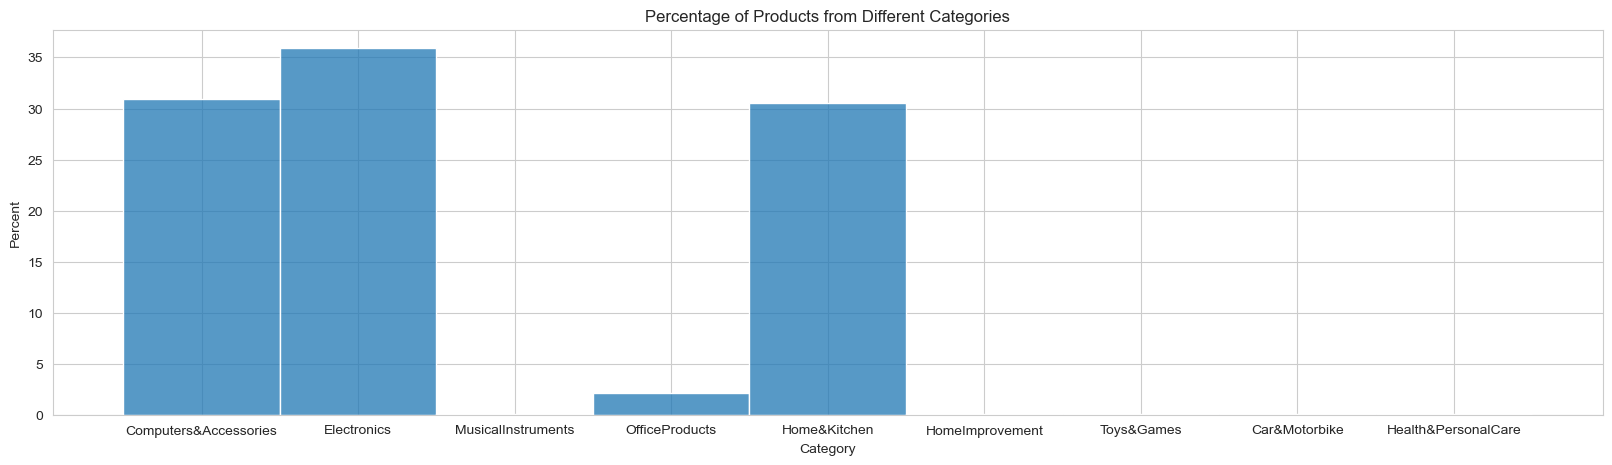

In [164]:
#This histogram shows the percent of products from each category.


plt.figure(figsize=(20,5))
sns.histplot(data=df, x='reduced_category', stat='percent')

plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')


#This shows that categories 'Electronics', 'Computer and Accessories' and 'Home and Kitchen' have the highest percetages of sale.

Text(0.5, 1.0, 'Relation between Category and Number of Ratings')

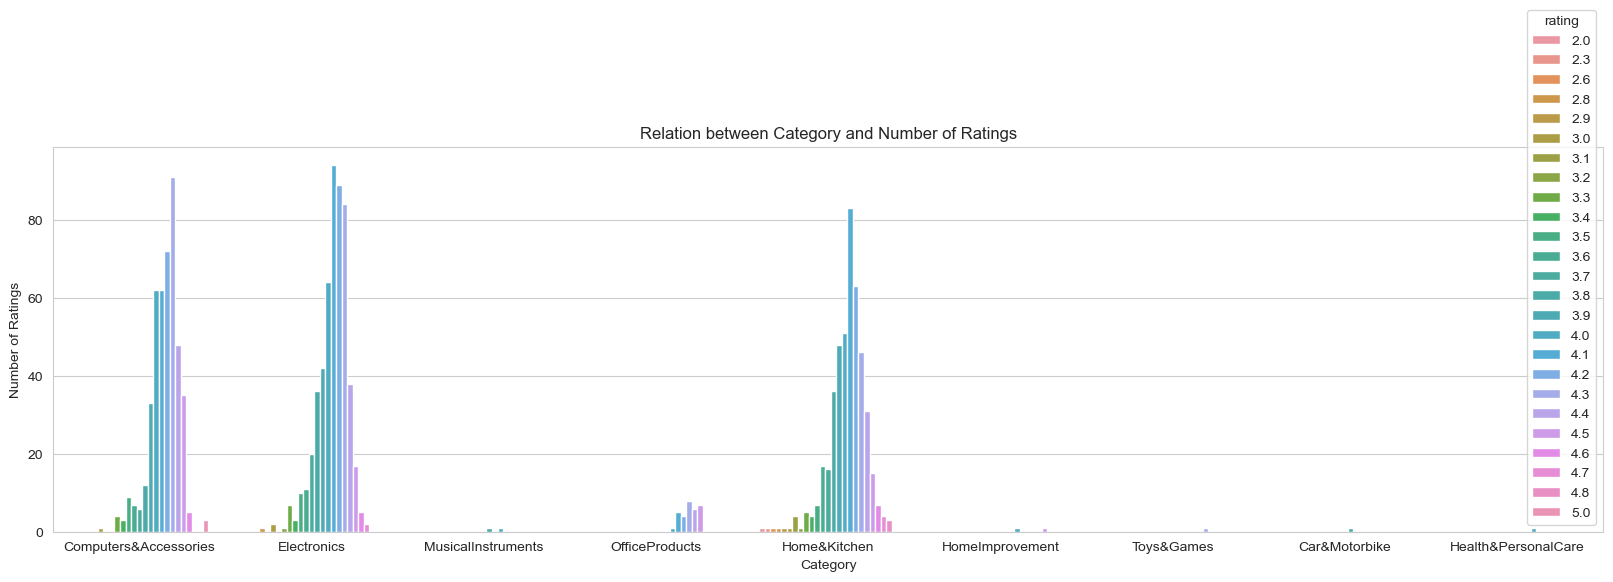

In [165]:
#Products grouped by Category and counted based on Ratings

plt.figure(figsize=(20,5))
sns.countplot(data=df, x='reduced_category', hue='rating')

plt.xlabel('Category')
plt.ylabel('Number of Ratings')
plt.title('Relation between Category and Number of Ratings')


#Electronics have the highest rating count and Car and Motorbike and Health and Personal Care have the minimum.

([<matplotlib.axis.XTick at 0x1d41c2200>,
 [Text(0, 0, '64%'),
  Text(10, 0, '55%'),
  Text(20, 0, '70%'),
  Text(30, 0, '58%'),
  Text(40, 0, '86%'),
  Text(50, 0, '52%'),
  Text(60, 0, '76%'),
  Text(70, 0, '7%'),
  Text(80, 0, '6%'),
  Text(90, 0, '3%'),
  Text(100, 0, '')])

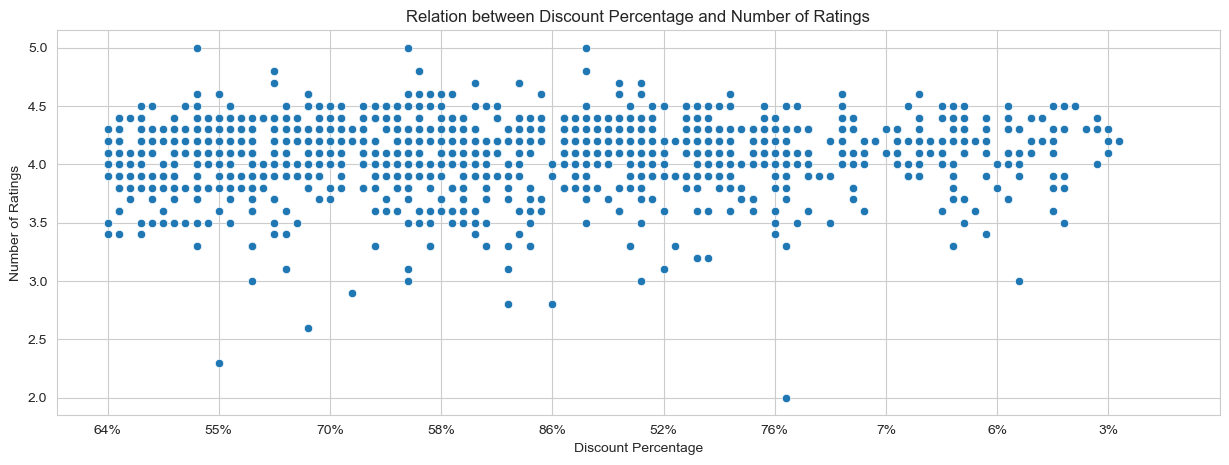

In [166]:
#This plot tell us the demand (seen from number of ratings) of different products on the basis of discount_price.

plt.figure(figsize=(15,5))

sns.scatterplot(data=df, x='discount_percentage', y='rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Ratings')
plt.title('Relation between Discount Percentage and Number of Ratings')
plt.xticks(list(range(0, 101, 10)))


#This shows us that there was maximum sale of products when they were on a discount of about 40% and 70%-80%. Most people tend to buy products when they find very high discounts. 

## Refined Research question/interests for Milestone 3

1. **How discounts can affect the sales and number of ratings of different products?**

I saw from the last visualisation that the products which have high discounts are tend to be more attractive for customers than the ones which have low discounts on them.

2. **How there is variation in the discount percentage in the top 3 categories?**

For this question, I can plot the variations in the discount percentages for the top 3 categories. This question will be interesting to analyse as it includes visualisations from my other 2 research questions

3. **Which category of products has the highest sale?**

From the first and second visualisation, I saw that there are top 3 categories which have the highest sale.


In [60]:
df=pd.read_csv('../data/raw/amazon 2.csv')
print("File type:", type(df))
print("Delimiter:", df.dtypes)


File type: <class 'pandas.core.frame.DataFrame'>
Delimiter: product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [61]:
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [ ]:
# Removing columns not being used
df = df.drop(columns=["product_link"])

#Replacing Not Available with NaN
df = df.replace("Not available", pd.np.nan)


In [63]:
#drop all the null values from the dataset
df.dropna(axis=0,how="any",inplace=True) 

# Check if the null values have been removed
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
dtype: int64

In [64]:

df["category_type"] = df["category"].apply(lambda x: x.split(" > ")[0]) #extracting main category
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'category_type'],
      dtype='object')


In [65]:
#find and replacing operation
df = df.replace({"5 star": 5, "4 star": 4, "3 star": 3, "2 star": 2, "1 star": 1})


In [68]:
#dealing with outliers by calculating the interquartile range, setting lower and upper bounds and selecting only rows with discounter_price within the bounds.
df["discounted_price"] = df["discounted_price"].astype(float)

q1 = df["discounted_price"].quantile(0.25)
q3 = df["discounted_price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df["discounted_price"] >= lower_bound) & (df["discounted_price"] <= upper_bound)]

In [70]:
# create a pivot table of discounted price by category 
pivot_table = pd.pivot_table(df, values="discounted_price", index="category_type", aggfunc="mean")
pivot_table = pivot_table.round(2)
pivot_table

/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_61889/2699427142.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = pd.pivot_table(df, values="discounted_price", index="category_type", aggfunc="mean")


""
category_type
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers
...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens"


In [71]:
def load_and_process(filename):
    df = pd.read_csv(filename)
    
    # Method Chain 1: Remove columns not being used, deal with incorrect data, and deal with missing data
    df = (df.drop(columns=[ "product_link"])
         .replace("Not available", pd.np.nan)
         .dropna())
    
    # Method Chain 2: Create new columns
    df = (df.assign(category_type=df["category"].apply(lambda x: x.split(" > ")[0]))
          .replace({"5 star": 5, "4 star": 4, "3 star": 3, "2 star": 2, "1 star": 1}))
    
    # Method Chain 3: Deal with outliers
    q1 = df["discounted_price"].quantile(0.25)
    q3 = df["discounted_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df["discounted_price"] >= lower_bound) & (df["discounted_price"] <= upper_bound)]
    
    
    return df

In [ ]:
from ../code import project_functions1
df = project_functions1.load_and_process('../data/raw/amazon 2.csv')
df

Research Question 1: **How discounts can affect the sales and number of ratings of different products?**

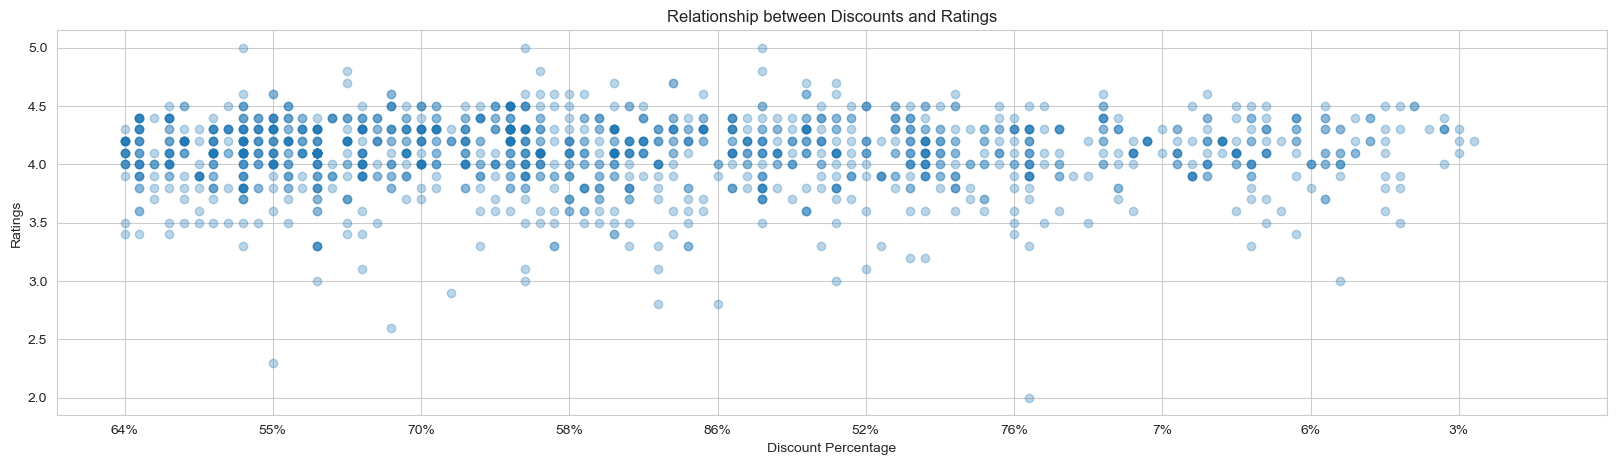

In [168]:

plt.figure(figsize=(20,5))
plt.scatter(df["discount_percentage"], df["rating"], alpha=0.3)
plt.xlabel("Discount Percentage")
plt.ylabel("Ratings")
plt.title("Relationship between Discounts and Ratings")
plt.xticks(rotation=0)
plt.xticks(list(range(0, 101, 10)))
plt.show()


**This scatterplot helps us visualise the relationship between discount percentages and the customer ratings. We can see from the plot that products with higher discount percentages have higher ratings and higher sales. This suggests that customers may be more price-sensitive than rating-sensitive when it comes to purchasing products.**

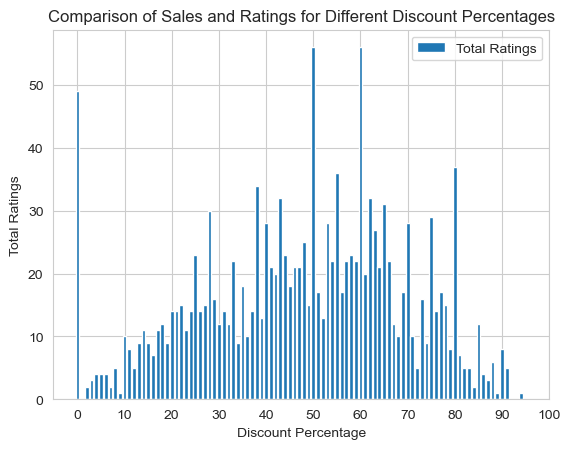

In [176]:
df_grouped = df.groupby("discount_percentage").agg({"rating": "count"}).reset_index()

plt.bar(df_grouped["discount_percentage"], df_grouped["rating"], label="Total Ratings")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Ratings")
plt.title("Comparison of Sales and Ratings for Different Discount Percentages")
plt.legend()
plt.xticks(list(range(0, 101, 10)))
plt.show()



**This barplot also helps in showing that with higher discount percentages there are higher sales since there are more ratings.**

Research Question 2: **How there is variation in the discount percentage in the top 3 categories?**

Text(0, 0.5, 'Top 3 categories')

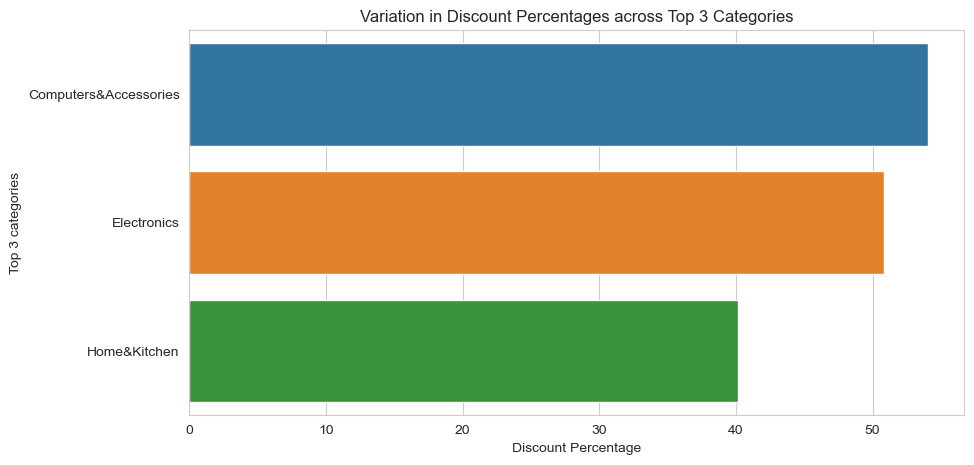

In [175]:
top_categories = df['reduced_category'].value_counts().head(3).index.tolist()
df_top_categories = df[df['reduced_category'].isin(top_categories)]

plt.figure(figsize=(10, 5))
sns.barplot(x='discount_percentage', y='reduced_category', data=df_top_categories, errorbar=None)
plt.xlabel('Discount Percentage')
plt.title('Variation in Discount Percentages across Top 3 Categories')
plt.ylabel('Top 3 categories')




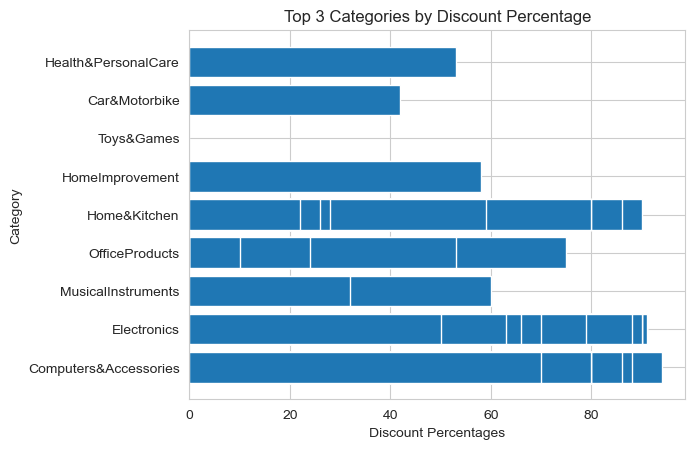

In [173]:
df['discount_percentage'] = df['discount_percentage'].astype(str)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
plt.barh(df['reduced_category'], df['discount_percentage'])
plt.xlabel('Discount Percentages')
plt.ylabel('Category')
plt.title('Top 3 Categories by Discount Percentage')
plt.show()

Research Question 3: **Which category of products has the highest sale?**

Text(0.5, 1.0, 'Percentage of Products from Different Categories')

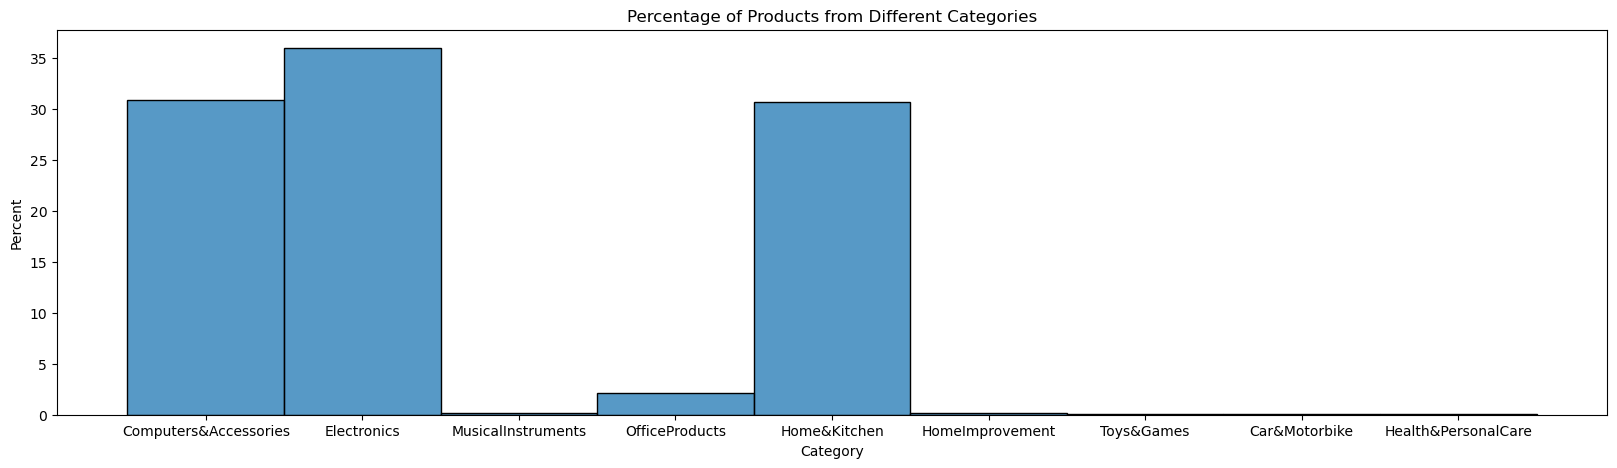

In [85]:
#This histogram shows the percent of products from each category.


plt.figure(figsize=(20,5))
sns.histplot(data=df, x='reduced_category', stat='percent')

plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')


#This shows that categories 'Electronics', 'Computer and Accessories' and 'Home and Kitchen' have the highest percetages of sale.

Text(0.5, 1.0, 'Relation between Category and Number of Ratings')

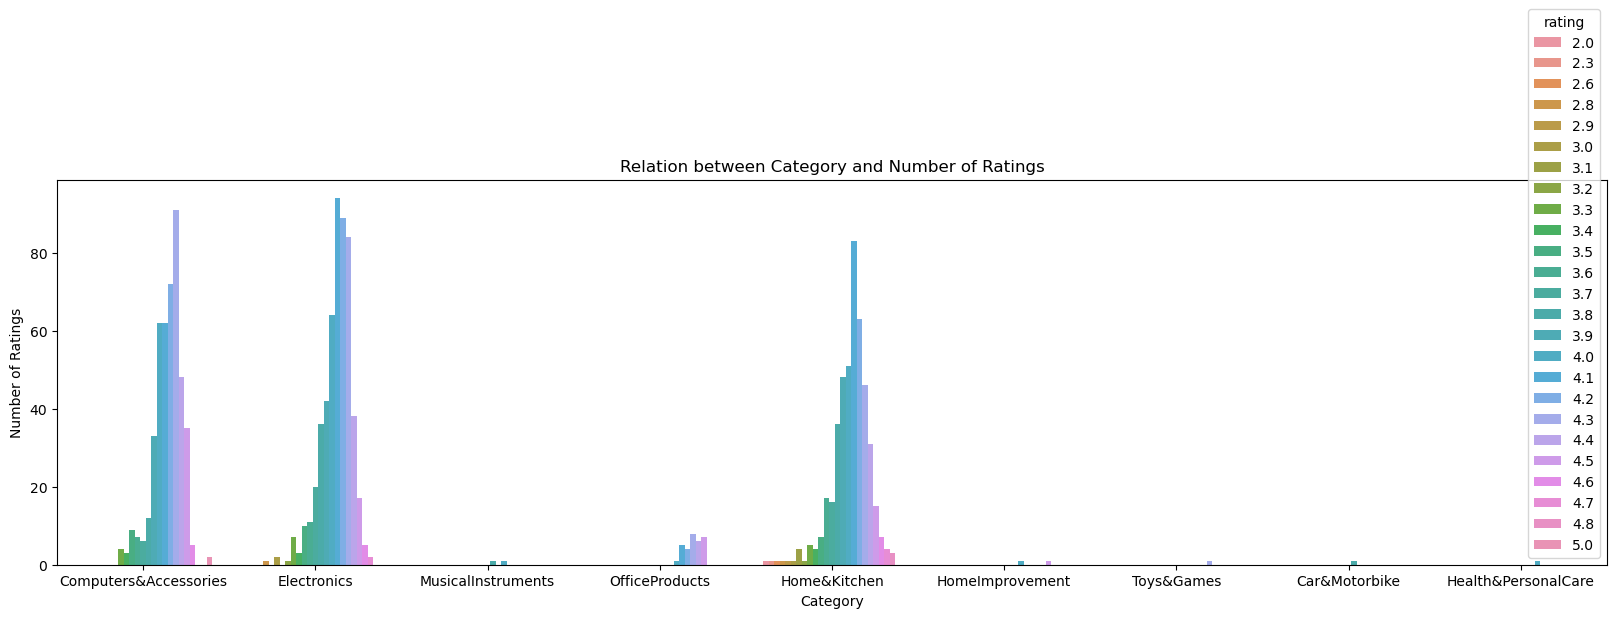

In [86]:
#Products grouped by Category and counted based on Ratings

plt.figure(figsize=(20,5))
sns.countplot(data=df, x='reduced_category', hue='rating')

plt.xlabel('Category')
plt.ylabel('Number of Ratings')
plt.title('Relation between Category and Number of Ratings')


#Electronics have the highest rating count and Car and Motorbike and Health and Personal Care have the minimum.

In [80]:
df.to_csv('../data/processed/processed.csv', index=False)

## Research question/interests

1. **How discounts can affect the sales and number of ratings of different products?**

I saw from the last visualisation that the products which have high discounts are tend to be more attractive for customers than the ones which have low discounts on them.

2. **How there is variation in the discount percentage in the top 3 categories?**

For this question, I can plot the variations in the discount percentages for the top 3 categories. This question will be interesting to analyse as it includes visualisations from my other 2 research questions

3. **Which category of products has the highest sale?**

From the first and second visualisation, I saw that there are top 3 categories which have the highest sale.

### Conclusion

1. I made 2 data visualizations for my 1st research question. First, a scatterplot that helps us visualise the relationship between discount percentages and the customer ratings. We can see from the plot that products with higher discount percentages have higher ratings and higher sales. This suggests that customers may be more price-sensitive than rating-sensitive when it comes to purchasing products. Second, I created a barchart between the discount percentages and thhe count of ratings. This helps us analyzing the ranges of discount percentages which have higher sales as they have higher ratings. We can see that ranges from 40-50% and 60-80% have higher number of ratings, therefore higher sales. 

2. I made one barplot and one barchart to visually analyze my second research question. Both of them show that Computer and Accessories have the highest discount percentages, even though Electronics is the category with most sales. 

3. For my 3rd research question, I have made one histogram and one count plot. They both show me that Electronics has the highest sale. The first visualization tells us this by calculating the percentages of all the categories as a whole. The second plot tells us this on the basis of number of ratings. We can also see that Toys and Games have the least sale